In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
import pandas as pd

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
data = pd.read_csv('./mushrooms.csv')

In [53]:
#input features
X = data.drop('class', axis = 1)

In [54]:
y = data['class'].values

In [55]:
#turns the char values into columns of int 0 and 1 (truth table)
#example: odor = 'n' becomes odor_n = 0 or odor_n = 1
X = pd.get_dummies(X)

In [56]:
#open this file for further examples
X.to_csv('mushroom_features.csv', index = False)

In [57]:
#splits the data set into a traing and test set wherein the test set is 30% of the data set. random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
#create a decision tree model
tree_clf = DecisionTreeClassifier(max_depth = 5,random_state=42, criterion ="gini")

In [59]:
#decision tree training
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [60]:
#creates a visualization of the decision tree
feature_names = X.columns
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="mushroom_clf.dot",
    feature_names = feature_names,
    class_names=['edible','poisonous'],
    rounded = True,
    filled=True,
    special_characters=True
)

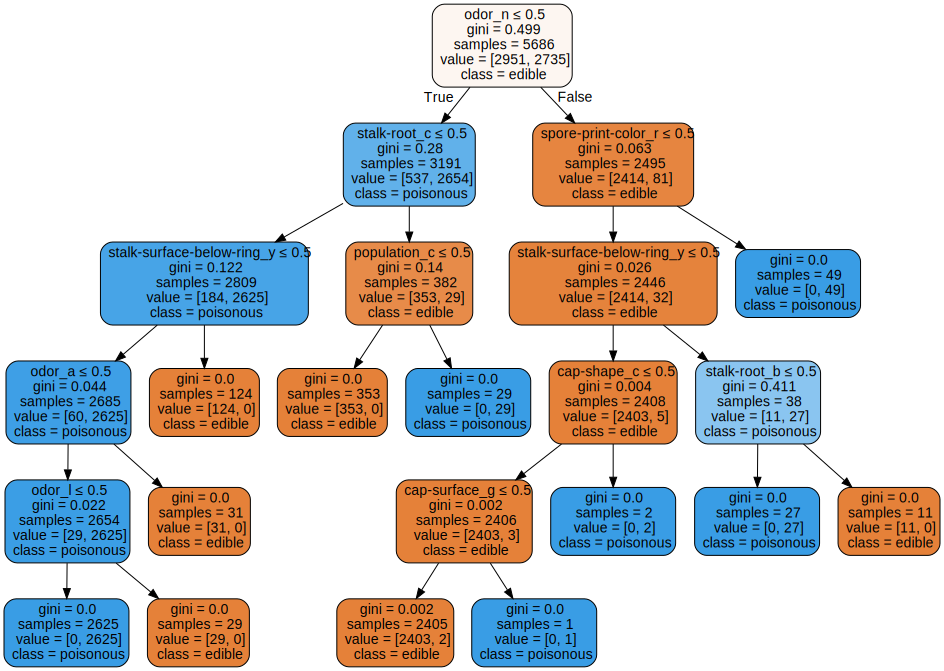

In [61]:
#displays the decision tree model visualization
from graphviz import Source
graph = Source.from_file("mushroom_clf.dot")
graph.render("mushroom_tree_gini")
graph

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [63]:

cross_val_score(tree_clf,X_train,y_train, cv=5, scoring="accuracy")

array([1.        , 0.99736148, 0.99912049, 1.        , 0.99824099])

In [64]:
y_mushroom_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
#outputs confusion matrix
# [TN][FP]
# [FN][TP]
# false positive: dangerous (labeled edible but actually poisonous)

cm = confusion_matrix(y_train,y_mushroom_pred)
cm

array([[2947,    4],
       [   5, 2730]])

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [68]:
#accuracy score
acs = accuracy_score(y_train,y_mushroom_pred)

#precision score
#precision should be very high to avoid false positives
ps =precision_score(y_train,y_mushroom_pred, average = "macro")
#recall score
rs = recall_score(y_train, y_mushroom_pred, pos_label='e')
#f1 score
fs =f1_score(y_train, y_mushroom_pred, pos_label='e')

print("Accuracy Score: ", acs)
print("Precision Score: ", ps)
print("Recall Score: ", rs)
print("F1 Score: ", fs)

Accuracy Score:  0.9984171649665846
Precision Score:  0.9984215876357739
Recall Score:  0.9986445272788885
F1 Score:  0.9984753515161783


In [69]:
#Test set
test_pred = tree_clf.predict(X_test)
cm = confusion_matrix(y_test,test_pred)
cm

array([[1257,    0],
       [   1, 1180]])

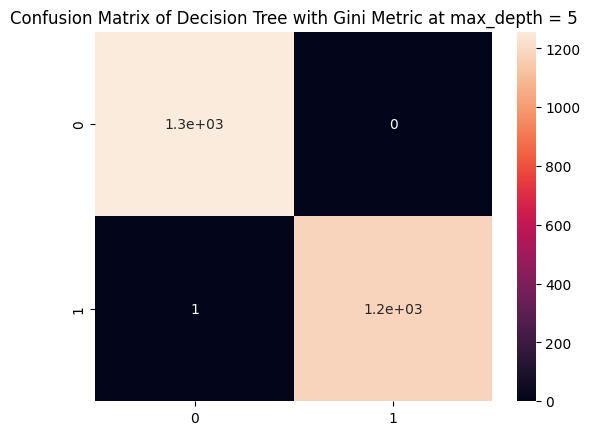

In [70]:
import seaborn as sb
import matplotlib.pyplot as plt

cmg = sb.heatmap(cm, annot=True)
plt.title("Confusion Matrix of Decision Tree with Gini Metric at max_depth = 5")
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [71]:
acs_test = accuracy_score(y_test,test_pred)
ps_test = precision_score(y_test,test_pred, average = "macro")
rs_test = recall_score(y_test,test_pred, pos_label='e')
fs_test = f1_score(y_test,test_pred, pos_label='e')

print("Accuracy Score: ", acs_test)
print("Precision Score: ", ps_test)
print("Recall Score: ", rs_test)
print("F1 Score: ", fs_test)

Accuracy Score:  0.9995898277276456
Precision Score:  0.9996025437201908
Recall Score:  1.0
F1 Score:  0.9996023856858848


In [73]:
'''
RUN THIS TO GET ALL SCORES WITH VARYING HYPERPARAMETERS
'''

#change these values here
max_depth = 6
criterion_testing = 'gini'




models = []
for x in range(2,max_depth):
  models.append(DecisionTreeClassifier(max_depth = x,random_state=42, criterion =criterion_testing))

for model in models:
  #decision tree training
  model.fit(X_train,y_train)
  cross_val_score(model,X_train,y_train, cv=3, scoring="accuracy")
  y_mushroom_pred = cross_val_predict(model, X_train, y_train, cv=3)
  print("------------------")
  print("Max Height: ", models.index(model) + 2)
  print("------------------")
  print("Training Dataset:")
  #accuracy score
  acs = accuracy_score(y_train,y_mushroom_pred)

  #precision score
  #precision should be very high to avoid false positives
  ps =precision_score(y_train,y_mushroom_pred, average = "macro")
  #recall score
  rs = recall_score(y_train, y_mushroom_pred, pos_label='e')
  #f1 score
  fs =f1_score(y_train, y_mushroom_pred, pos_label='e')
  
  print("Accuracy Score: ", acs)
  print("Precision Score: ", ps)
  print("Recall Score: ", rs)
  print("F1 Score: ", fs)
  print("------------------")
  print("Testing Dataset: ")
  
  test_pred = model.predict(X_test)
  acs_test = accuracy_score(y_test,test_pred)
  ps_test = precision_score(y_test,test_pred, average = "macro")
  rs_test = recall_score(y_test,test_pred, pos_label='e')
  fs_test = f1_score(y_test,test_pred, pos_label='e')
  print("------------------")
  print("Accuracy Score: ", acs_test)
  print("Precision Score: ", ps_test)
  print("Recall Score: ", rs_test)
  print("F1 Score: ", fs_test)
  print("------------------")


------------------
Max Height:  2
------------------
Training Dataset:
Accuracy Score:  0.9569117129792473
Precision Score:  0.9570246500307333
Recall Score:  0.9376482548288716
F1 Score:  0.9576051219934244
------------------
Testing Dataset: 
------------------
Accuracy Score:  0.9479081214109926
Precision Score:  0.9490166510344233
Recall Score:  0.9172633253778838
F1 Score:  0.9478010686395396
------------------
------------------
Max Height:  3
------------------
Training Dataset:
Accuracy Score:  0.9859303552585297
Precision Score:  0.9857481332789627
Recall Score:  0.976279227380549
F1 Score:  0.9863060595686408
------------------
Testing Dataset: 
------------------
Accuracy Score:  0.9819524200164069
Precision Score:  0.9819524200164069
Recall Score:  0.9673826571201273
F1 Score:  0.9822294022617125
------------------
------------------
Max Height:  4
------------------
Training Dataset:
Accuracy Score:  0.9927893070699965
Precision Score:  0.9926546851318019
Recall Score:  0.